# Problem Statement

In this project, I am going to predict electric consumption by applying ML algorithms and compare which model performs better.

# Dataset Description

This dataset has 12083 rows and 940 columns. I would perform feature selection by removing irrelevant or less significant features for better model performance and to avoid overfitting. Also, feature scaling should be done before training our models, since some ML algorithms like Linear Regression and KNN are sensitive to magnitudes. 
I would apply supervised regression algorithms to our dataset as our target variable is continuous. 

data source: https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata

# Data Cleaning

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# read file
data = pd.read_csv(r"C:\Users\yilin\OneDrive\Desktop\recs2009_public.csv")

In [2]:
# the dimensionality of the DataFrame
data.shape

(12083, 940)

In [3]:
# first 5 rows of dataframe
data.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [4]:
# get basic dataframe information
data.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,6042.000000,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,3488.205986,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,3021.500000,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,6042.000000,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,9062.500000,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,12083.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


- **DOEID** column is Unique Identifier for each respondent which is not useful for training models. We can drop it. 

In [5]:
# drop DOEID column
data = data.drop('DOEID', axis = 1)

In [6]:
data.head()

,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,2,4,12,2,2471.68,4742,1080,4953,1271,4,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,4,10,26,2,8599.17,2662,199,2688,143,5,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,1,1,1,5,8969.92,6233,505,5741,829,1,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,2,3,7,2,18003.64,6034,672,5781,868,1,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,1,1,1,3,5999.61,5388,702,5313,797,1,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [7]:
# count of missing values column wise
data.isnull().sum()

REGIONC              0
DIVISION             0
REPORTABLE_DOMAIN    0
TYPEHUQ              0
NWEIGHT              0
                    ..
WSF                  0
OA_LAT               0
GWT                  0
DesignDBT99          0
DesignDBT1           0
Length: 939, dtype: int64

In [8]:
# count of missing values of the entire dataframe 
data.isnull().sum().sum()

0

- There is no missing value in the dataset.

## Dealing with outliers

In [9]:
# replace outliers with upper limit and lower limt
def cap_data(df):
    '''
    INPUT: df, original dataframe
    OUTPUT: df, dataframe without outliers
    '''
    for col in df.columns:
        if (((df[col].dtype) == 'float64') | ((df[col].dtype) == 'int64')):
            percentiles = df[col].quantile([0.01, 0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col] = df[col]
    return df


data = cap_data(data)

In [10]:
# data type of each column
data.dtypes

REGIONC                int64
DIVISION               int64
REPORTABLE_DOMAIN      int64
TYPEHUQ                int64
NWEIGHT              float64
                      ...   
WSF                  float64
OA_LAT                 int64
GWT                  float64
DesignDBT99            int64
DesignDBT1             int64
Length: 939, dtype: object

In [11]:
# unique data type
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [12]:
# features
X = data.drop('KWH', axis = 1)
len(X.columns)

938

In [13]:
# target variable
y = data[['KWH']]

## Encoding Categorical Variables

In [14]:
# object data type categorical variables
cat_columns1 = list(X.select_dtypes(include='O').columns)
X[cat_columns1] = X[cat_columns1].astype('category')

In [15]:
# encode obejct columns
for col in cat_columns1:
    X[col] = X[col].cat.codes
X[cat_columns1].head()

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
0,0,1,0,0,5
1,0,1,0,0,4
2,0,1,0,0,7
3,0,1,0,0,7
4,0,1,0,0,7


We move on numerical columns. Here we make some assumptions about categorical variables if they have numeric values. It need satisfy both conditions below to be considered as categorical columns.
1. numerical columns that have **smaller than 5** unique values are categorical columns. 
2. numerical columns that have standard deviation of **below 5**.

In [16]:
# below 5 unique values
nunique_below5 = X.select_dtypes(include='int64').nunique(
)[X.select_dtypes(include='int64').nunique() <= 5].index.tolist()
len(nunique_below5)

757

In [17]:
# standard deviation of 5
std_below5 = X.select_dtypes(include='int64').std(
)[X.select_dtypes(include='int64').std() <= 5].index.tolist()
len(std_below5)

808

In [18]:
# only columns satisfied two assumptions 
cat_columns2 = list(set(std_below5) & set(nunique_below5))
len(cat_columns2)

755

In [19]:
# categorical variables subset
cat_columns = cat_columns1 + cat_columns2
len(cat_columns)

760

We have 760 categorical columns. 

In [20]:
# convert categorical variables to 'category' data type
X[cat_columns] = X[cat_columns].astype('category')
X[cat_columns].head()

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub,ZTEMPHOME,BASEUSE,HELPCFLY,SIZRFRI2,AUTOCOOLDAY,...,ZAGEHHMEMCAT4,HSFUEL,ZGARGHEAT,USEKERO,ZDVD1,ZCHRGPLGE,ZMONITOR2,ESFRIG2,ZCOMBODVR3,WASHTEMP
0,0,1,0,0,5,0,1,-2,4,1,...,0,-2,0,0,0,0,0,1,0,3
1,0,1,0,0,4,0,-2,-2,-2,-2,...,0,-2,0,0,0,0,0,-2,0,3
2,0,1,0,0,7,0,-2,-2,-2,-2,...,0,-2,0,0,0,0,0,-2,0,-2
3,0,1,0,0,7,0,-2,-2,3,-2,...,0,-2,0,0,0,0,0,-2,0,2
4,0,1,0,0,7,0,1,-2,-2,-2,...,0,-2,0,0,0,0,0,-2,0,2


In [21]:
# continuous variables
cont_columns = X.columns[~X.columns.isin(cat_columns)]
len(cont_columns)

178

We have 178 continuous columns.

In [22]:
len(cat_columns) + len(cont_columns)

938

In [23]:
# the number of column
X.shape[1]

938

It confims that we have 938 columns. 

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
# scale continuous columns
scaler = StandardScaler()
X[cont_columns] = scaler.fit_transform(X[cont_columns])
# first 5 rows of scaled continuous columns
X[cont_columns].head()

,DIVISION,REPORTABLE_DOMAIN,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,...,TOTALDOLOTH,PERIODNG,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,-0.480226,-0.339658,-1.399396,0.263508,-0.295982,0.367885,-0.168365,1.328639,1.402354,0.857265,...,-0.513493,-1.058155,0.316270,-0.321746,0.191755,-0.227988,0.053662,-0.365140,-0.741695,0.936577
1,1.618228,1.368600,-0.154039,-0.640627,-1.078043,-0.642789,-1.279775,1.086697,0.930542,0.857265,...,-0.603059,0.259142,-1.163607,-0.439884,-0.528474,1.345135,-0.837199,0.566932,1.174780,-2.556270
2,-1.529453,-1.681861,-0.075640,0.911616,-0.806408,0.719502,-0.603864,-0.243980,-0.484893,0.199760,...,-0.899174,2.015539,0.481181,-0.349311,0.736291,-0.227988,-0.391769,-0.831176,-0.543439,-0.394032
3,-0.829969,-0.949750,1.834636,0.825115,-0.658162,0.737350,-0.565438,0.562491,0.458731,-1.115249,...,-0.542739,2.015539,0.769234,-0.542270,0.459757,0.619078,-0.243292,-0.481649,-0.873865,-0.560358
4,-1.529453,-1.681861,-0.703744,0.544311,-0.631531,0.528522,-0.635394,0.481844,0.458731,-1.115249,...,-0.385542,0.259142,0.412768,-0.542270,0.647862,1.345135,-0.243292,-1.064194,-0.477353,-0.061379


In [25]:
# first 5 rows of categorical columns
X[cat_columns].head()

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub,ZTEMPHOME,BASEUSE,HELPCFLY,SIZRFRI2,AUTOCOOLDAY,...,ZAGEHHMEMCAT4,HSFUEL,ZGARGHEAT,USEKERO,ZDVD1,ZCHRGPLGE,ZMONITOR2,ESFRIG2,ZCOMBODVR3,WASHTEMP
0,0,1,0,0,5,0,1,-2,4,1,...,0,-2,0,0,0,0,0,1,0,3
1,0,1,0,0,4,0,-2,-2,-2,-2,...,0,-2,0,0,0,0,0,-2,0,3
2,0,1,0,0,7,0,-2,-2,-2,-2,...,0,-2,0,0,0,0,0,-2,0,-2
3,0,1,0,0,7,0,-2,-2,3,-2,...,0,-2,0,0,0,0,0,-2,0,2
4,0,1,0,0,7,0,1,-2,-2,-2,...,0,-2,0,0,0,0,0,-2,0,2


# Model Building

We will try 4 models here - **Linear Regression, KNN, Decision Tree Regressor, Random Forest Regressor** to predict the energy consumption. 
To compare the performance of the models, we will use cross-validated **RMSE score** as an evaluation metric. 

## with all features 

In [26]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [27]:
# models
models = {'Linear Regression': LinearRegression(n_jobs=-1),
          'KNN': KNeighborsRegressor(n_jobs=-1),
          'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=1),
          'Random Forest Regressor': RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1)
          }

In [28]:
# evaluate model performance

def rmse_score(X):
    '''
    INPUT: X, selected feature dataframe
    OUTPUT: df, result dataframe
    '''
    score = []
    model_name = []
    n_feature = []

    for i, j in models.items():
        rmse = abs(cross_val_score(j, X, y, cv=5,
                   scoring='neg_root_mean_squared_error').mean().round(2))
        score.append(rmse)
        model_name.append(i)
        n_feature.append(X.shape[1])
        
    df = pd.DataFrame(list(zip(model_name, score, n_feature)), columns=[
                      'Model Name', 'RMSE', 'Number of Feature'])

    return df

In [29]:
# call the function on the all features
output_x = rmse_score(X)
output_x

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,KNN,4039.45,938
2,Decision Tree,19.06,938
3,Random Forest Regressor,10.00,938


Linear Regression has lowest RMSE. We have over 900 features, it is easily overfitting and we need also take multicollinearity into consideration. We now check linear regression with L1 penalty (aka the Lasso). 

In [30]:
# lasso RMSE
rmse_lasso = -cross_val_score(Lasso(),
                              X, y, cv=5, scoring='neg_root_mean_squared_error').mean().round(2)

#append lasso result to output dataframe
output_x = output_x.append({'Model Name': 'Lasso', 
                            'RMSE': rmse_lasso,
                            'Number of Feature': X.shape[1]}, ignore_index = True)
output_x

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,KNN,4039.45,938
2,Decision Tree,19.06,938
3,Random Forest Regressor,10.00,938
4,Lasso,6.30,938


RMSE of lasso on all features is greater than that of linear regression model. **It implies that linear regression model has multicollinearity problem on the full feature set**. 

# Feature Selection 

## By Variation
Only apply the variance filter on continuous variables. Before applying variance filter we need normalize the continuous variables. 

In [31]:
from sklearn.preprocessing import normalize
normalize = pd.DataFrame(
    normalize(data[cont_columns]), columns=data[cont_columns].columns)
normalize.head(5)

,DIVISION,REPORTABLE_DOMAIN,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,...,TOTALDOLOTH,PERIODNG,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,0.000039,0.000118,0.026696,0.046716,0.010640,0.048794,0.012521,0.019742,0.000069,0.000079,...,0.005418,-0.000020,0.020856,0.000552,0.041869,0.000005,0.000059,0.000552,0.000089,0.000946
1,0.000063,0.000164,0.054272,0.016801,0.001256,0.016965,0.000903,0.012610,0.000038,0.000050,...,0.003162,0.000006,0.000391,0.000164,0.015103,0.000004,0.000000,0.000404,0.000240,0.000473
2,0.000010,0.000010,0.090711,0.063033,0.005107,0.058058,0.008384,0.019872,0.000030,0.000071,...,0.003428,0.000051,0.023725,0.000496,0.057178,0.000005,0.000030,0.000526,0.000121,0.000890
3,0.000026,0.000060,0.155303,0.052051,0.005797,0.049868,0.007488,0.017123,0.000043,0.000043,...,0.004606,0.000043,0.023688,0.000000,0.042622,0.000005,0.000035,0.000474,0.000060,0.000750
4,0.000010,0.000010,0.061616,0.055335,0.007210,0.054565,0.008185,0.020365,0.000051,0.000051,...,0.006367,0.000010,0.023118,0.000000,0.055725,0.000006,0.000041,0.000514,0.000134,0.000924


In [32]:
# High variance continuous columns
s_var = normalize.var()
cont_columns_var= s_var[s_var>=0.005].index.tolist() # setting the threshold as 0.5%
len(cont_columns_var)

12

In [33]:
# drop variables that have a variation of below 0.005
X_variance = X.drop(s_var[(s_var.values < 0.005)].index.tolist(), axis=1)
X_variance.shape[1]

772

- Now we have 772 features left. 

In [34]:
# check RMSE score after dropping low variance variables
output_x_variance = rmse_score(X_variance)
output_x_variance

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.09,772
1,KNN,4907.02,772
2,Decision Tree,18.49,772
3,Random Forest Regressor,9.27,772


In [35]:
pd.concat([output_x, output_x_variance]).reset_index(drop=True)

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,KNN,4039.45,938
2,Decision Tree,19.06,938
3,Random Forest Regressor,10.00,938
4,Lasso,6.30,938
5,Linear Regression,0.09,772
6,KNN,4907.02,772
7,Decision Tree,18.49,772
8,Random Forest Regressor,9.27,772


- Tree based algorithms: RandomForestRegressor and DecisionTreeRegressor performance improve a little bit after dropping low variance variables.
- Distance based algorithms: LinearRegression and KNN performance is a little worser than before. 

## By frequency

For categorical variables, we can look at the frequency distribution of the categories. If a single category is repeating more frequency, let's say by 90% or more, we can drop it.

In [36]:
cat_columnsinfo = X.select_dtypes(include='category').describe().T
cat_columnsinfo['percentage'] = cat_columnsinfo.apply(lambda x: x['freq']/x['count'], axis = 1)
cat_columnsinfo.head()

,count,unique,top,freq,percentage
REGIONC,12083,4,3,4090,0.338492
TYPEHUQ,12083,5,2,7803,0.645783
Climate_Region_Pub,12083,5,1,3993,0.330464
AIA_Zone,12083,5,3,3079,0.254821
METROMICRO,12083,3,0,10302,0.852603


In [37]:
# category columns that a high frequency single variable
frequency_above80 = cat_columnsinfo[cat_columnsinfo['percentage'] > 0.8].index.tolist()
len(frequency_above80)

563

In [38]:
# drop that variables
X_frequency = X_variance.drop(frequency_above80, axis=1)
X_frequency.shape[1]

209

In [39]:
output_x_frequency = rmse_score(X_frequency)
output_x_frequency

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.09,209
1,KNN,4686.71,209
2,Decision Tree,18.51,209
3,Random Forest Regressor,9.03,209


In [40]:
# concat the previous RMSE dataframe
pd.concat([output_x, output_x_variance, output_x_frequency]
          ).reset_index(drop=True)

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,KNN,4039.45,938
2,Decision Tree,19.06,938
3,Random Forest Regressor,10.00,938
4,Lasso,6.30,938
5,Linear Regression,0.09,772
6,KNN,4907.02,772
7,Decision Tree,18.49,772
8,Random Forest Regressor,9.27,772
9,Linear Regression,0.09,209


RMSE is similar to previous step (after dropping low variance variables). **Decision Tree and Random Forest** performs better after reducing feature numbers **from 938 to 209**. 

In [41]:
# catogorical columns
cat_columns_frequency = X_frequency.select_dtypes(include='category').columns
len(cat_columns_frequency)

197

In [42]:
# continuous columns
cont_columns_frequency = X_frequency.select_dtypes(exclude='category').columns
len(cont_columns_frequency)

12

In [43]:
# number of features
len(cat_columns_frequency) + len(cont_columns_frequency)

209

It confirms that we have 209 features left. Now we move on to correlation analysis. 

## By Correlation 
### Pairwise Correlation (Pearson correlation)

<AxesSubplot:>

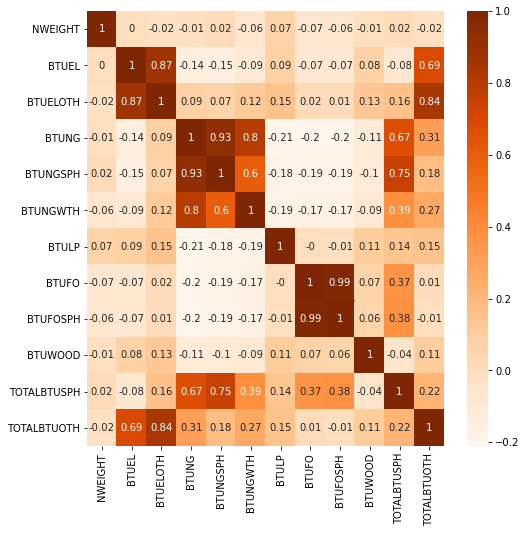

In [44]:
# correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.heatmap(X_frequency[cont_columns_frequency].corr().round(
    2), annot=True, cmap='Oranges')

In [45]:
# paire-wise correlation
def correlation(data, threshold):
    '''
    INPUT: data, dataframe
           threshold,  float
    OUTPUT: pairwise correlation dataframe
    '''
    rowname = []
    colname = []
    corr_score = []
    corr_matrix = data.corr()

    for i in range(0, len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                rowname.append(corr_matrix.index[i])
                colname.append(corr_matrix.columns[j])
                corr_score.append(abs(corr_matrix.iloc[i, j]).round(2))
                
    df = pd.DataFrame(list(zip(rowname, colname, corr_score)), columns=[
                      'Row Name', 'Column Name', 'Pairewise Correlation'])

    return df

In [46]:
# highly pairwise correlated columns 
high_corr_col = correlation(X_frequency[cont_columns_frequency], 0.7)
high_corr_col

,Row Name,Column Name,Pairewise Correlation
0,BTUELOTH,BTUEL,0.87
1,BTUNGSPH,BTUNG,0.93
2,BTUNGWTH,BTUNG,0.80
3,BTUFOSPH,BTUFO,0.99
4,TOTALBTUSPH,BTUNGSPH,0.75
5,TOTALBTUOTH,BTUELOTH,0.84


Drop one of highly pairwise correlated variables. The criteria is to keep which one has higher correlation with target variables. 

### Cotinuous variables correlation with target variables

In [47]:
# continuous variables with target variables
corr_df = pd.concat([data[cont_columns_frequency], data['KWH']], axis =1)
corr_df.head()

,NWEIGHT,BTUEL,BTUELOTH,BTUNG,BTUNGSPH,BTUNGWTH,BTULP,BTUFO,BTUFOSPH,BTUWOOD,TOTALBTUSPH,TOTALBTUOTH,KWH
0,2709.864,63006.0,26362.97,0.0,0.00,0.00,0.0,0,0.0,0,10873.0,26363.0,18466.0
1,8599.170,17565.0,12473.54,85895.0,38605.96,30109.97,0.0,0,0.0,20000,38606.0,29653.0,5148.0
2,8969.920,7568.0,3814.29,51148.0,40248.23,7932.98,0.0,0,0.0,0,40248.0,6781.0,2218.0
3,18003.640,34171.0,18403.93,42230.0,40195.58,0.00,0.0,0,0.0,0,40196.0,20438.0,10015.0
4,5999.610,9789.0,8606.86,50020.0,36136.28,13883.72,0.0,0,0.0,0,36136.0,8607.0,2869.0


In [48]:
# correlation with target variables
abs(corr_df.corr()['KWH'])

NWEIGHT        0.004499
BTUEL          1.000000
BTUELOTH       0.874143
BTUNG          0.138346
BTUNGSPH       0.149421
BTUNGWTH       0.090591
BTULP          0.090609
BTUFO          0.070284
BTUFOSPH       0.072004
BTUWOOD        0.082210
TOTALBTUSPH    0.081012
TOTALBTUOTH    0.690381
KWH            1.000000
Name: KWH, dtype: float64

In [49]:
# above correlation of 0.5 variables
s_corr = abs(corr_df.corr()['KWH'])[abs(corr_df.corr()['KWH']) > 0.5].sort_values(ascending = False)
s_corr 

KWH            1.000000
BTUEL          1.000000
BTUELOTH       0.874143
TOTALBTUOTH    0.690381
Name: KWH, dtype: float64

In [50]:
# high correlation continuous columns
pairwise_corr_col = list(set(list(high_corr_col['Row Name']) + list(high_corr_col['Column Name'])))
cont_columns_corr = s_corr[s_corr.index.isin(pairwise_corr_col)].index.tolist()
cont_columns_corr

['BTUEL', 'BTUELOTH', 'TOTALBTUOTH']

Those variables highly correlated with each other **BTUEL, BTUELOTH, TOTALBTUOTH** are also highly correlated with target variabels (> 0.5). Since the correlation of **BTUEL** is higher than that of **BTUELOTH**. we keep **BTUEL** and remove **BTUELOTH**. 

In [51]:
# remove BTUELOTH
cont_columns_corr.remove('BTUELOTH')
print(cont_columns_corr)

['BTUEL', 'TOTALBTUOTH']


In [52]:
# number of continous columns
len(cont_columns_corr)

2

- After removing low variance variables and keep high correlation varaibles **(above 0.5)** with target variables, we have 2 continuous features left.

In [53]:
# number of features after variance and correlation analysis
len(cont_columns_corr) + len(cat_columns_frequency)

199

In [54]:
# continuous columns need to be dropped 
drop_cont_corr = list(set(cont_columns_frequency) - set(cont_columns_corr))

In [55]:
# dataframe after variance and correlation analysis
X_corr = X_frequency.drop(columns=drop_cont_corr)
X_corr.shape[1]

199

We now have 199 features left. Let's see how it performs.

In [56]:
output_x_corr = rmse_score(X_corr)
output_x_corr

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.09,199
1,KNN,4889.79,199
2,Decision Tree,16.89,199
3,Random Forest Regressor,9.11,199


In [57]:
pd.concat([output_x, output_x_variance, output_x_frequency,
          output_x_corr]).reset_index(drop=True)

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,KNN,4039.45,938
2,Decision Tree,19.06,938
3,Random Forest Regressor,10.00,938
4,Lasso,6.30,938
5,Linear Regression,0.09,772
6,KNN,4907.02,772
7,Decision Tree,18.49,772
8,Random Forest Regressor,9.27,772
9,Linear Regression,0.09,209


**Random Forest** and **Decision Tree** perform better after reducing feature numbers from **938** to **199**.

### categorical features - continuous target (ANOVA)

Assuming that

1. The samples are independent.

2. Each sample is from a normally distributed population.

3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity

Then perform ANOVA test on categorical features and continuous target variables:

- **Ho**(Null Hypothesis): Two variables are not correlated.
- **Ha**(Alternative Hypothesis): Two variables are correlated.

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
keys = []
tables = []

# anova dataframe
anova_df = pd.concat([X_frequency[cat_columns_frequency], data['KWH']], axis=1)

for variable in cat_columns_frequency:
    model = ols('KWH ~ {}'.format(variable), data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    keys.append(variable)
    tables.append(anova_table)

# anova result
anova_result = pd.concat(tables, keys=keys, axis=0)
anova_result

sum_sq       df           F  \
REGIONC            REGIONC             8.724649e+10      3.0  662.130640   
                   Residual            5.305350e+11  12079.0         NaN   
TYPEHUQ            TYPEHUQ             9.072006e+10      4.0  519.729286   
                   Residual            5.270614e+11  12078.0         NaN   
Climate_Region_Pub Climate_Region_Pub  6.251247e+10      4.0  339.936863   
...                                             ...      ...         ...   
KAVALNG            Residual            5.505465e+11  12079.0         NaN   
SCALENG            SCALENG             6.680363e+10      4.0  366.101058   
                   Residual            5.509778e+11  12078.0         NaN   
IECC_Climate_Pub   IECC_Climate_Pub    8.251806e+10     10.0  186.106134   
                   Residual            5.352634e+11  12072.0         NaN   

                                              PR(>F)  
REGIONC            REGIONC              0.000000e+00  
                   Residual                      NaN  
TYPEHUQ            TYPEHUQ              0.000000e+00  
                   Residual                      NaN  
Climate_Region_Pub Climate_Region_Pub  9.799037e-278  
...                                              ...  
KAVALNG            Residual                      NaN  
SCALENG            SCALENG             4.707379e-298  
                   Residual                      NaN  
IECC_Climate_Pub   IECC_Climate_Pub     0.000000e+00  
                   Residual                      NaN  

[394 rows x 4 columns]

- If p < 0.05, we **refuse null hypothesis** and accept alternative hypothesis which means that **the categorical variable is correlated with target variable.**
- If p > 0.05, we **fail to refuse null hypothesis** which means that **the categorical variable is not correlated with target variable.**

In [59]:
# categorical variables are correlated with target variables
cat_columns_anova = anova_result[anova_result['PR(>F)'] < 0.05].index.get_level_values(0).tolist()
len(cat_columns_anova)

194

In [60]:
# categorical variables are not correlated with target variables
list(set(cat_columns_frequency) - set(cat_columns_anova))

['HHSEX', 'TOASTER', 'HELPWIN']

In [61]:
# confirm the result
anova_result[anova_result['PR(>F)'] > 0.05].index.get_level_values(0)

Index(['TOASTER', 'HELPWIN', 'HHSEX'], dtype='object')

We can see **TOASTER, HELPWIN, HHSEX** are not correlated with target variables. 

In [62]:
len(cont_columns_corr) + len(cat_columns_anova) 

196

After filtering method, we have 196 features left. 

In [63]:
# features after filter method
X_filter = X_corr[cont_columns_corr + cat_columns_anova]
X_filter.shape[1]

196

In [64]:
output_x_filter = rmse_score(X_filter)
output_x_filter

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.09,196
1,KNN,4899.08,196
2,Decision Tree,17.67,196
3,Random Forest Regressor,8.91,196


In [65]:
model_result = pd.concat([output_x, output_x_variance, output_x_frequency,
          output_x_corr, output_x_filter]).reset_index(drop=True)
model_result

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,KNN,4039.45,938
2,Decision Tree,19.06,938
3,Random Forest Regressor,10.00,938
4,Lasso,6.30,938
5,Linear Regression,0.09,772
6,KNN,4907.02,772
7,Decision Tree,18.49,772
8,Random Forest Regressor,9.27,772
9,Linear Regression,0.09,209


After filtering method, the number of features reduces from 938 to 196. **Decision Tree and Random Forest perform better than before.** 

##  Feature Importance

In [66]:
# Build Random Forest Regressor
rf = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1)

# get each cv split output on filtered features
output = cross_validate(rf, X_filter, y, cv=5, scoring='neg_root_mean_squared_error',
                        return_estimator=True)  # return each cv split result

In [67]:
# Mean cross validate RMSE
print(f'RMSE of cross validate rf on test data with filtered features: ',
      abs(output['test_score'].mean()).round(2))

RMSE of cross validate rf on test data with filtered features:  8.91


In [68]:
# top 5 important features for each cv split
for idx, estimator in enumerate(output['estimator']):
    print(f'Features sorted by their scores for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_.round(2),
                                       index=X_filter.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    print("Top 5 important features")
    print(feature_importances.importance.nlargest(5))
    print("==="*15)

Features sorted by their scores for estimator 0:
Top 5 important features
BTUEL       1.0
MAINTHT     0.0
EQUIPAUX    0.0
CARRYEL     0.0
EQMAMT      0.0
Name: importance, dtype: float64
Features sorted by their scores for estimator 1:
Top 5 important features
BTUEL       1.0
MAINTHT     0.0
EQUIPAUX    0.0
CARRYEL     0.0
EQMAMT      0.0
Name: importance, dtype: float64
Features sorted by their scores for estimator 2:
Top 5 important features
BTUEL       1.0
MAINTHT     0.0
EQUIPAUX    0.0
CARRYEL     0.0
EQMAMT      0.0
Name: importance, dtype: float64
Features sorted by their scores for estimator 3:
Top 5 important features
BTUEL       1.0
MAINTHT     0.0
EQUIPAUX    0.0
CARRYEL     0.0
EQMAMT      0.0
Name: importance, dtype: float64
Features sorted by their scores for estimator 4:
Top 5 important features
BTUEL       1.0
MAINTHT     0.0
EQUIPAUX    0.0
CARRYEL     0.0
EQMAMT      0.0
Name: importance, dtype: float64


In [69]:
feature_importances.head()

,importance
BTUEL,1.0
MAINTHT,0.0
EQUIPAUX,0.0
CARRYEL,0.0
EQMAMT,0.0


**BTUEL** is the most important in the Random Forest model. Let's check on this column **BTUEL** (Total Site Electricity usage).

In [70]:
data[['BTUEL', 'KWH']].head()

,BTUEL,KWH
0,63006.0,18466.0
1,17565.0,5148.0
2,7568.0,2218.0
3,34171.0,10015.0
4,9789.0,2869.0


In [71]:
ratio = data['BTUEL']/data['KWH']

In [72]:
# min and max value of ratio
min(ratio), max(ratio)

(3.4115646258503403, 3.4124183006535946)

It implies that there is a linear relationship between **BTUEL** and **KWH**. But let's continue to compare which model performs better with this feature. Linear Regression or Random Forest? 

In [78]:
# cross validate RMSE score on Linear Regression
rmse_lr = abs(cross_val_score(LinearRegression(), X[['BTUEL']], y, cv=5,
    scoring='neg_root_mean_squared_error').mean().round(2))
rmse_lr

0.09

In [79]:
# cross validate RMSE score on Random Forest
rmse_rf = abs(cross_val_score(rf, X[['BTUEL']], y, cv=5,
    scoring='neg_root_mean_squared_error').mean().round(2))
rmse_rf

5.55

RMSE of a RF model with only 1 column **BTUEL** (5.55) is **lower than** that of a RF model with 196 filtered features (8.91).  **Linear Regression** has the lowest RMSE (0.09). By far we have selected the most important feature from 939 features. 

# Model Tunning

With the most important **BTUEL** column, let's tunning our random forest model. 

## Grid Search with cross validation 

In [80]:
from sklearn.model_selection import GridSearchCV

# grid search parameters 
params = {
    'n_estimators': list(range(100, 500, 100)),
    'max_depth': list(range(10, 100, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [81]:
# instantiate the grid search model
gs = GridSearchCV(
    RandomForestRegressor(random_state=1, n_jobs=-1),
    param_grid= params,
    scoring='neg_root_mean_squared_error',
    cv = 5
)

In [87]:
# fit the grid search to the data
gs.fit(X[['BTUEL']], y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_root_mean_squared_error')

In [83]:
#best grid search parameters
gs.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [84]:
# RMSE 
gs_best_score =abs(gs.best_score_).round(2)
gs_best_score

4.06

# Model Comparison 

In [85]:
# Linear regression model and random forest model with BTUEL feature
BTUEL_df = pd.DataFrame({'Model Name': ['Linear Regression', 'Random Forest Regressor'],
                         'RMSE': [rmse_lr, gs_best_score],
                         'Number of Feature': [1, 1]})
BTUEL_df

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.09,1
1,Random Forest Regressor,4.06,1


In [86]:
# final model result dataframe
model_result = pd.concat([model_result, BTUEL_df]).sort_values(
    by=['RMSE', 'Number of Feature'], ascending=[True, True]).reset_index(drop=True)
model_result

,Model Name,RMSE,Number of Feature
0,Linear Regression,0.03,938
1,Linear Regression,0.09,1
2,Linear Regression,0.09,196
3,Linear Regression,0.09,199
4,Linear Regression,0.09,209
5,Linear Regression,0.09,772
6,Random Forest Regressor,4.06,1
7,Lasso,6.30,938
8,Random Forest Regressor,8.91,196
9,Random Forest Regressor,9.03,209


From the above result, we can see that **Random Forest Regressor performance improves 59.4%** by reducing RMSE from 10 to 4.06 after applying feature selection and model tunning. It is even better than LASSO on 938 features (6.30). But **Linear Regression RMSE** (0.09) is **lower than Random Forest** (4.06) with the most important feature. 

# Conclusion

In this project, I have applied multiple methods to perform feature selection and selected the most important feature **BTUEL** from 938 features. **Linear Regression** predicts **better** than **Random Forest** with the most important feature **BTUEL**.  